# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 0 - Knowledge Test - Predict Lending Club Defaulters



**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors**: Pavlos Protopapas, Mark Glickman

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- **This is an individual HW, meant to test your knowledge of CS109a material. It will not be graded BUT you need to turn it in through Canvas.** 

<hr style="height:2pt">

![Lending club](https://blog.lendingclub.com/wp-content/uploads/2017/05/LC-Logo-Official-min.png)


### Overview 

[Lending Club](https://en.wikipedia.org/wiki/Lending_Club) is the world's largest peer-to-peer lending platform. The company claims that \\$15.98 billion in loans had been originated through its platform up to December 31, 2015.  Lending Club enables borrowers to create unsecured personal loans between \\$1,000 and \\$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The dataset for this homework is derived from the full version of [Loan Data](https://www.lendingclub.com/info/download-data.action). Loans are for period Q3-2014, Q4-2015 and Q1-2015. We have done some preprocessing for you. 

Data dictionary is available for your reference in data folder. Please note that purpose and verification status have been one-hot-encoded, see data dictionary. 

### Use only the libraries below:

In [2]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklean
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm #Linear Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score

from keras.callbacks import EarlyStopping, ModelCheckpoint


import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers

from sklearn.ensemble import BaggingClassifier


Using TensorFlow backend.



<hr style="height:2pt">

### Problem 1 - Data Exploration

**1.1 The dataset is large so we provide it to you as a zip file. Unzip the file and load the dataset from the csv file `data/loans_cs109b.csv` into a pandas dataframe.**  

**Display `.shape()` and `.head()` of the dataframe. Which columns are categorical columns? Identify categorical columns programmatically and explain.**

**Your target column is `loan_status`. Is this a classification problem or a regression problem?**

In [60]:
loan_dat = pd.read_csv('data/loans_cs109b.csv')

Let's see if we can determine the type of the variable from using information in quick description methods.

In [4]:
print(loan_dat.shape)
display(loan_dat.head())

(190287, 87)


,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,url,title,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400,6.99%,A,A3,8.0,1,58000.0,0,114662,4,...,0,0,0,0,0,0,0,1,0,0
1,15000,12.39%,C,C1,10.0,3,78000.0,1,120463,6,...,0,0,0,0,0,0,0,0,1,0
2,7650,13.66%,C,C3,0.0,3,50000.0,0,117549,6,...,0,0,0,0,0,0,0,0,1,0
3,21425,15.59%,D,D1,6.0,3,63800.0,1,119764,4,...,0,0,0,0,0,0,0,0,1,0
4,9600,13.66%,C,C3,10.0,3,69000.0,1,119482,6,...,0,0,0,0,0,0,0,0,1,0


In [9]:
display(loan_dat.dtypes)

loan_amnt                        int64
int_rate                        object
grade                           object
sub_grade                       object
emp_length                     float64
home_ownership                   int64
annual_inc                     float64
loan_status                      int64
url                              int64
title                            int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                 int64
fico_range_low                   int64
fico_range_high                  int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                       int64
total_acc                        int64
initial_list_status              int64
collections_12_mths_ex_me

We do not get anything important from the above, so let's try an offend method. 

In [22]:
print('{:30}| {:20} | {}'.format('Variable', '# of Unique Entries', 'Type'))
for col in loan_dat.columns:
    check = len(set(loan_dat[col]))
    if check < 100:
        print('{:30}| {:20} | {}'.format(col, check, 'categorical'))
    else:
        print('{:30}| {:20} | {}'.format(col, check, 'not categorical'))

Variable                      | # of Unique Entries  | Type
loan_amnt                     |                 1277 | not categorical
int_rate                      |                   76 | categorical
grade                         |                    7 | categorical
sub_grade                     |                   35 | categorical
emp_length                    |                   12 | categorical
home_ownership                |                    4 | categorical
annual_inc                    |                14879 | not categorical
loan_status                   |                    2 | categorical
url                           |               190287 | not categorical
title                         |                   29 | categorical
zip_code                      |                  867 | not categorical
addr_state                    |                   46 | categorical
dti                           |                 3996 | not categorical
delinq_2yrs                   |                  

In the above, we look for the number of unique entries in the entries of the variables. In this manner, the binary variables are clear as they will have two unique entries. Of coruse, we could imagine that some categories might have as few as two categories to perhaps even 20 or more. I set the above cutoff for determining cateogories at 100, but this is not definitive and illustrates the importance of familiarizing yourself with the data at hand i.e. the importance of having descriptors for your variabels and reading them. 

**1.2 Create a plot showing distribution of target column.  Interpret your plot.**

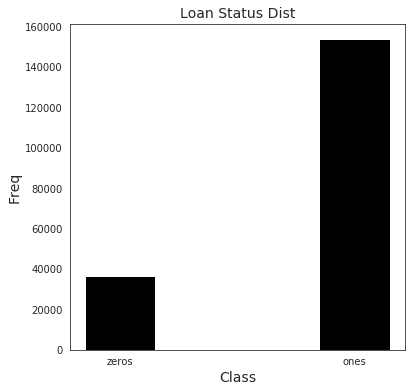

In [95]:
ones = sum(loan_dat['loan_status'].values == 1)
zeros = loan_dat.shape[0] - ones
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.bar([0,1], [zeros, ones], width=0.3, color = 'k')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['zeros', 'ones'])
    ax.set_xlabel('Class', fontsize=14)
    ax.set_ylabel('Freq', fontsize=14)
    ax.set_title('Loan Status Dist', fontsize=14)
    
    

We see that there were significantly more status codes of '1' over '0'. 

**1.3 Create a visualization showing `grade` and `loan_status`. Do the same for `sub_grade`. Interpret your plots.**

**Hint:**
*Your plot should be able to convey which grade (or subgrade) has highest (and least) number of defaulters. You may create a table or a heatmap.*


In [175]:
grade_dat = loan_dat.groupby('grade')['loan_status'].agg({'0': lambda x: x.count()-x.sum(), '1': 'sum', 'success': lambda x: x.sum()/x.count(), 'total': 'count'})
display(subgrade_dat)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,0,1,success,total
grade,,,,
A,1969,33849,0.945028,35818
B,6205,44349,0.877260,50554
C,10836,41441,0.792720,52277
D,9104,21658,0.704050,30762
E,5831,9071,0.608710,14902
F,2080,2576,0.553265,4656
G,674,644,0.488619,1318


In [189]:
subgrade_dat = loan_dat.groupby('sub_grade')['loan_status'].agg({'0': lambda x: x.count()-x.sum(), '1': 'sum', 'success': lambda x: x.sum()/x.count(), 'total': 'count'})
display(subgrade_dat)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,0,1,success,total
sub_grade,,,,
A1,135,5100,0.974212,5235
A2,246,5560,0.957630,5806
A3,245,5378,0.956429,5623
A4,510,8099,0.940760,8609
A5,833,9712,0.921005,10545
B1,850,7981,0.903748,8831
B2,1011,8571,0.894490,9582
B3,1271,9144,0.877964,10415
B4,1465,9369,0.864778,10834


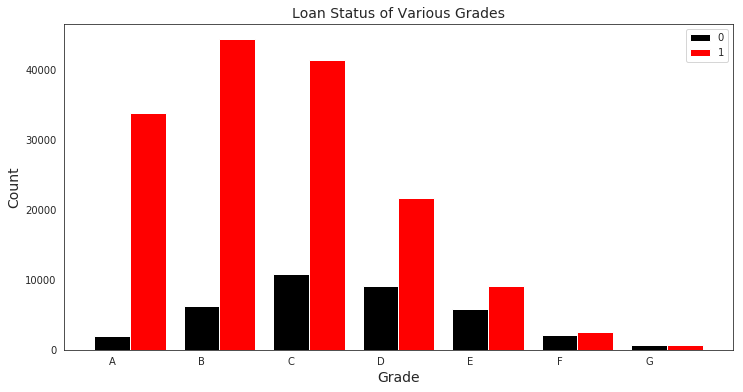

In [196]:
x_vals = np.arange(1, 1+len(grade_dat.index))
w=0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.bar(x_vals, grade_dat['0'], width=w, color = 'k', label = '0', tick_label=list(grade_dat.index))
    ax.bar(x_vals+w, grade_dat['1'], width=w, color = 'r', label = '1')
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title('Loan Status of Various Grades', fontsize=14)
    ax.legend()
    

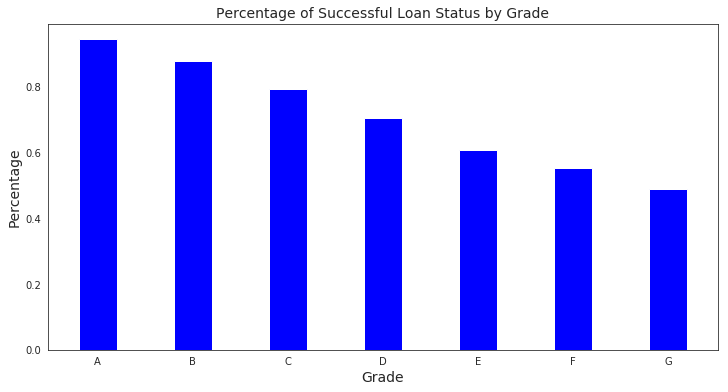

In [185]:
x_vals = np.arange(1, 1+len(grade_dat.index))
w=0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.bar(x_vals, grade_dat['success'], width=w, color = 'b', label = '0', tick_label=list(grade_dat.index))
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_title('Percentage of Successful Loan Status by Grade', fontsize=14)    

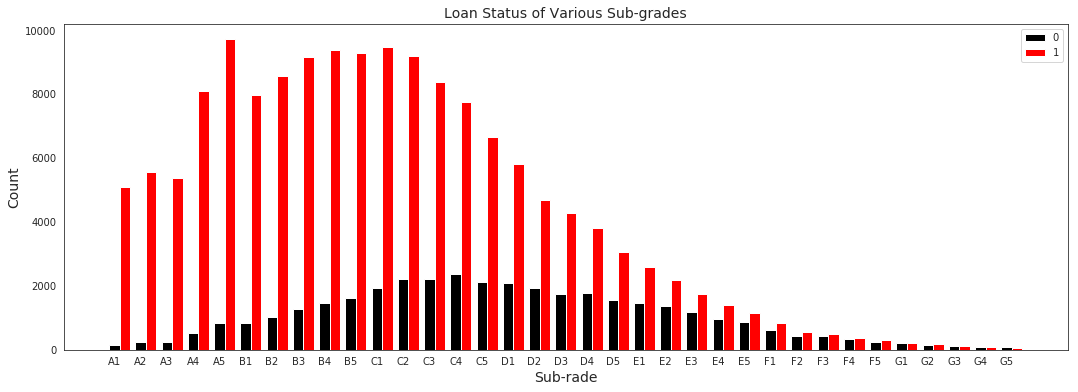

In [195]:
x_vals = np.arange(1, 1+len(subgrade_dat.index))
w = 0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.bar(x_vals, subgrade_dat['0'], width=w, color = 'k', label = '0', tick_label=list(subgrade_dat.index))
    ax.bar(x_vals+w, subgrade_dat['1'], width=w, color = 'r', label = '1')
    ax.set_xlabel('Sub-rade', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title('Loan Status of Various Sub-grades', fontsize=14)
    ax.legend()
    

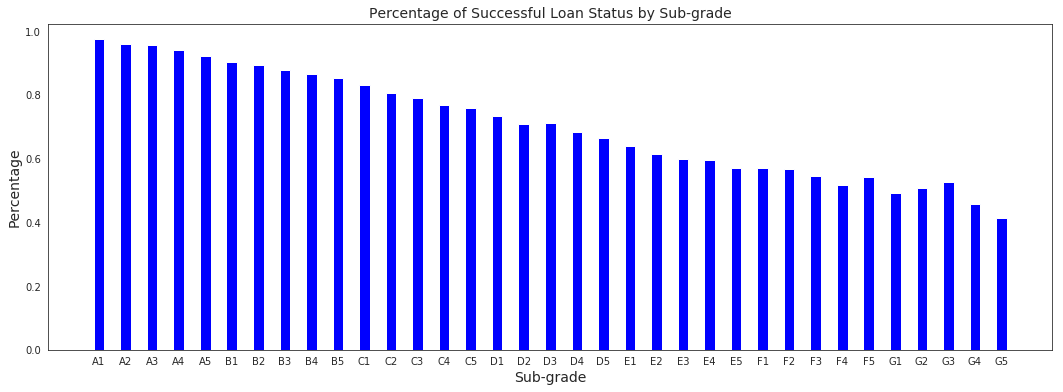

In [194]:
x_vals = np.arange(1, 1+len(subgrade_dat.index))
w=0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.bar(x_vals, subgrade_dat['success'], width=w, color = 'b', label = '0', tick_label=list(subgrade_dat.index))
    ax.set_xlabel('Sub-grade', fontsize=14)
    ax.set_ylabel('Percentage', fontsize=14)
    ax.set_title('Percentage of Successful Loan Status by Sub-grade', fontsize=14)    

In [ ]:
x_vals = np.arange(1, 1+len(subgrade_dat.index))
w = 0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.bar(x_vals, subgrade_dat['0'], width=w, color = 'k', label = '0', tick_label=list(subgrade_dat.index))
    ax.bar(x_vals+w, subgrade_dat['1'], width=w, color = 'r', label = '1')
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Number', fontsize=14)
    ax.set_title('Loan Status of Various Grades', fontsize=14)
    ax.legend()
    

From the distribution of the counts of loan status counts - 0 or 1 - on grades and subgrades, we see that the loan statuses encoded as 0 appear to be closely distributed as normal, whereas the loan statuses of 1 are right skewed. This tells us that the number of successfull loans decreases as the grade of the loan decreases - worsens - whereas the number of failed loans seams to be increase up to point and fall off. The rise in failed loans is natural and intuitive; as the grade worsens, the number of failed loans increases, whereas the fail may be unintutive. The falloff is explained in the sense of information symmetry. Loans of poor grade are known to be risky, so fewer loans are made overall, and because the loans are poor, default continues to occur as predicted. 

**1.4 (a) Create a plot showing average debt to income ratio vs. grade**

**(b) Create a plot showing number of loans vs. loan purpose.**

**(c) Create a plot showing average interest rate vs grade. Interpret your plots.** 

*Hint: Look up the data dictionary*



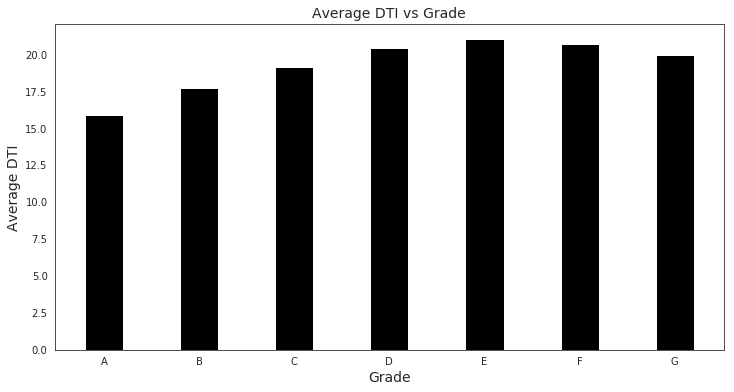

In [225]:
avg_dti_group = loan_dat.groupby('grade')['dti'].mean()
x_vals = np.arange(1, 1+len(grade_dat.index))
w = 0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.bar(x_vals, avg_dti_group, width=w, color = 'k', tick_label=list(grade_dat.index))
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Average DTI', fontsize=14)
    ax.set_title('Average DTI vs Grade', fontsize=14)    

In [255]:
purpose = ['car', 'credit_card', 'debt_consolidation', 'home_improvement', 'house', 'major_purchase', 'medical',
          'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding']
loan_purp = loan_dat.loc[:, purpose].apply(sum)
loan_purp

car                     1539
credit_card            42850
debt_consolidation    117330
home_improvement        9846
house                    645
major_purchase          3159
medical                 1827
moving                  1210
other                   8993
renewable_energy         123
small_business          1736
vacation                1023
wedding                    6
dtype: int64

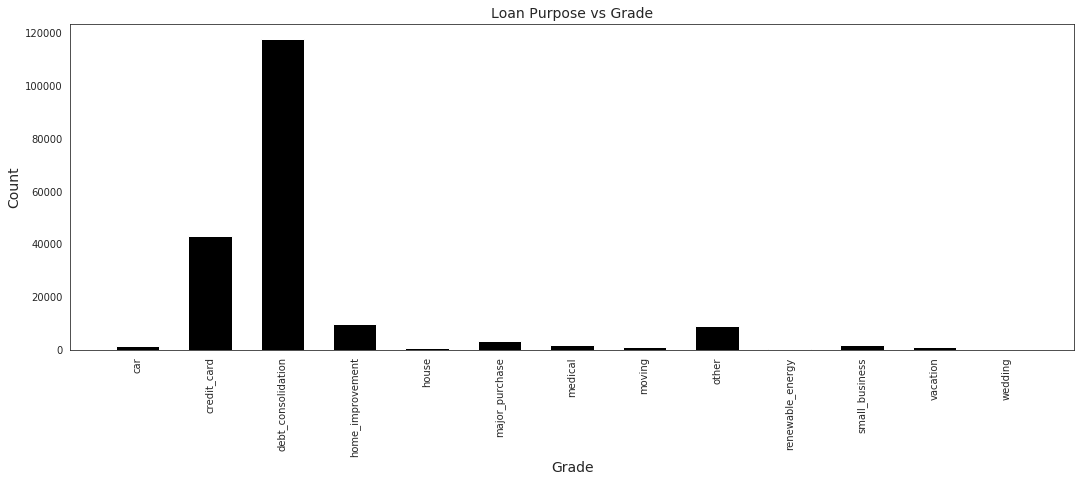

In [317]:
x_vals = np.arange(1, 1+len(loan_purp))
w = 0.6
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(18, 6))
    ax.bar(x_vals, loan_purp, width=w, color = 'k')
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_title('Loan Purpose vs Grade', fontsize=14)   
    ax.set_xticks(x_vals)
    ax.set_xticklabels(list(loan_purp.index.values), rotation='vertical')

In [14]:
import re
loan_dat['int_rate']= loan_dat['int_rate'].apply(lambda x: float(re.findall('([0-9]*.[0-9]*)%', x)[0]))
avg_ir_group = loan_dat.groupby('grade')['int_rate'].mean()

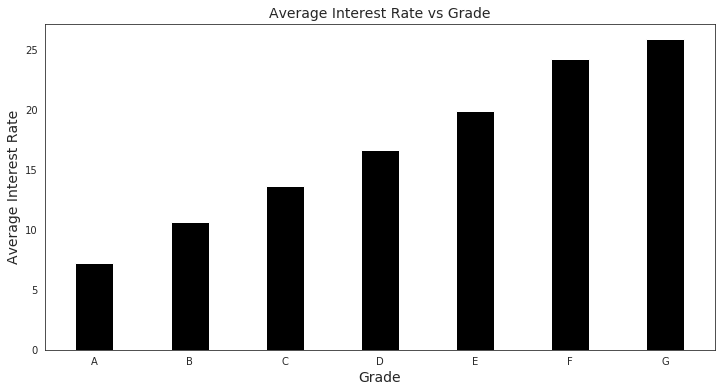

In [319]:
x_vals = np.arange(1, 1+len(grade_dat.index))
w = 0.4
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.bar(x_vals, avg_ir_group, width=w, color = 'k', tick_label=list(grade_dat.index))
    ax.set_xlabel('Grade', fontsize=14)
    ax.set_ylabel('Average Interest Rate', fontsize=14)
    ax.set_title('Average Interest Rate vs Grade', fontsize=14)    

**1.5 (a) Check if all categorical columns identified in 1.1 are actually categorical. If not, make necessary changes.**

**(b) Convert to numeric `grade` and `sub_grade`.**

In [29]:
loan_dat.grade = loan_dat.grade.astype('category')
loan_dat.sub_grade = loan_dat.sub_grade.astype('category')
loan_dat.addr_state = loan_dat.addr_state.astype('category')
loan_dat.zip_code = loan_dat.zip_code.astype('category')
loan_dat.title = loan_dat.title.astype('category')

In [61]:
loan = pd.get_dummies(loan_dat, drop_first=True)

In [74]:
loan.shape

(190287, 199)

**1.6 Split the dataset into X_train, y_train, X_test, y_test, ratio 80:20, random_state = 109, stratify on `loan_status`.**

**Why do we want to strafity? Explain the choice of `loan status` and if you choose a different variable.**

**Check the ratio for y_train and y_test**

In [62]:
y = loan.loan_status
X = loan.drop('loan_status', axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print(sum(y_train == 1)/y_train.shape[0])
print(sum(y_test == 1)/y_test.shape[0])

0.8072443489742428
0.806716064953492


### Problem 2: Building Models. We will be using log_loss as evaluation metric.

**2.1 Explain the difference between accuracy and log loss. (No code needed)**


Accuracy measures correctness of prediction based on whether the predicted class matches the true class. Log loss provides a measure of accuracy based on uncertainity of measurement i.e. based on the probability. Log loss is useful loss function to use when using gradient descent to optimize. 


**2.2 Fit a Linear Regression model on training data. Report log loss on `X_test`. What problems do you see in using Linear Regression for this problem ?**

In [66]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [76]:
lin_reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)

In [77]:
lin_reg_pred = lin_reg.predict(scaler.transform(X_test))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [80]:
lin_reg_pred_class = lin_reg_pred < 0.5

In [101]:
print(accuracy_score(y_test, lin_reg_pred_class))
lin_reg_log_loss = log_loss(y_test, lin_reg_pred)
print(lin_reg_log_loss)

0.1911818802879815
0.4744768485572718


Problems occur in that linear regression does not limit the range of output in this scenario to between 0 and 1. 

**2.3 Fit a Logisitc Regression model. Choose appropriate value of C. Set random_state=109. Report log loss on `X_test`.**

**Hints:**  <br/>
*You may set max_iter=1000* <br/>
*You may set solver = 'liblinear' to avoid warnings.* 

In [84]:
log_reg = LogisticRegression(max_iter=1000, random_state=109).fit(X_train, y_train)
log_reg_pred = log_reg.predict(scaler.transform(X_test))
log_reg_pred_prob = log_reg.predict_proba(scaler.transform(X_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [100]:
print(accuracy_score(y_test, log_reg_pred))
log_reg_log_loss = log_loss(y_test, log_reg_pred_prob)
print(lin_reg_log_loss)

0.8087918440275369
0.4401935670516152


**2.4 Fit a regularized model using `LogisticRegression()`. Set penalty = l2, random_state = 109.** 

**Report logloss on X_test.**

**Should you standardize your data before fitting regularized model ? Y/N and explain why.** 

**Hints:** <br/>
*You may set max_iter = 1000, C = 0.11*
<br/>
*You may set solver='liblinear' to avoid warnings.*


In [102]:
log_reg = LogisticRegression(max_iter=1000, random_state=109, C=0.5).fit(X_train, y_train)
log_reg_pred = log_reg.predict(scaler.transform(X_test))
log_reg_pred_prob = log_reg.predict_proba(scaler.transform(X_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
print(accuracy_score(y_test, log_reg_pred))
log_reg_reg_log_loss = log_loss(y_test, log_reg_pred_prob)
print(log_reg_reg_log_loss)

0.8087918440275369
0.4401935670516152


**2.5 (a) Create Bagging Classifier and Random Forest Model.**
*For bagging classifier set n_estimators = 100 and random_state = 109*
*For Random Forest set n_estimators = 500 and random_state = 109.*
**Report logloss on X_test.**

**(b) Explain the difference between Bagging and Random Forest. (No code)**

**Hints:**
<br/>
*It took ~12 mins on a 16GB, quad core, old macbook to run Bagging Classifier.* <br/>
*It took ~6 mins on a 16GB, quad core, old macbook to run RandomForest Classifier.*

In [91]:
bag_classifier = BaggingClassifier(n_estimators=100, random_state=109).fit(X_train, y_train)
rf_class = RandomForestClassifier(n_estimators=500, random_state=109).fit(X_train, y_train)

In [96]:
bag_log_loss = log_loss(y_test, bag_classifier.predict_proba(scaler.transform(X_test)))
rf_log_loss = log_loss(y_test, rf_class.predict_proba(scaler.transform(X_test)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [176]:
print(accuracy_score(y_test, bag_classifier.predict(scaler.transform(X_test))))
print(accuracy_score(y_test, rf_class.predict(scaler.transform(X_test))))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.8065058594776394


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


0.8086079142361658


In [97]:
print(bag_log_loss)
print(rf_log_loss)

0.47198888949039997
0.4442404898200625


Bagging uses accumlation of low bias models to reduce variance. Random forrests take the extra step of reducing variance by selecting a subset of predictors at each step in the tree. 

**2.6 Create a NN Model. You may use following hints as starting point. Then change some of the hyperparameters and report your findings.** <br/>
**Should you standardize your data before fitting NN model ? Y/N and explain.**

Hints:

Nodes per Layer: 40, 30, 25, 20, 15, 10, 5, 1 [Total 7 layers + last layer] <br/> 
Activation function: reLU <br/>
Optimizer: Nadam (use the defaults; no other tuning) <br/>
Epochs: No more than 50 <br/>
Batch size: 256 <br/>
Validation_data = Same as previous models <br/>
<br/>
Choose appropriate loss function and activation function for last layer. <br/>

You may regularize, kernel_initializer = 'glorot_uniform' and/or Early stopping  and/or by adding dropout of 0.2 before the final layer. 


In [142]:
from keras.utils import to_categorical

In [157]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [189]:
# create specified network
ann = Sequential()

# first layer 
ann.add(Dense(40, input_shape = (198,)))

# second layer
ann.add(Dense(30, activation='relu', kernel_initializer='normal'))

# third layer 
ann.add(Dense(25, activation='relu', kernel_initializer='normal'))

# fourth layer 
ann.add(Dense(20, activation='relu', kernel_initializer='normal'))

# fifth layer 
ann.add(Dense(15, activation='relu', kernel_initializer='normal'))

# sixth layer 
ann.add(Dense(10, activation='relu', kernel_initializer='normal'))

# seventh layer 
ann.add(Dense(25, activation='relu', kernel_initializer='normal'))

# output layer 
ann.add(Dense(1, activation='linear', kernel_initializer='normal'))

# compile it 
ann.compile(loss='mean_squared_error', optimizer='nadam')

ann.summary()

ann_hist = ann.fit(
    X_train, y_train,
    batch_size = 256, epochs=50,
    validation_split = 0.5, verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 40)                7960      
_________________________________________________________________
dense_34 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_35 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_36 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_37 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_39 (Dense)             (None, 25)                275       
__________

In [193]:
ann_pred = ann.predict(X_test)
ann_pred_class = ann_pred > 0.5

In [196]:
ann_log_loss = log_loss(y_test, ann_pred)
print(ann_log_loss)
accuracy_score(y_test, ann_pred_class)

0.4909554834026992


0.806716064953492

### Problem 3: Model Comparison

**3.1 Create a table comparing all validation log losses you found above.**

**3.2 Which model did best ?**

**3.3 Would you invest your money based on these results? What could you improve?  (code optional)**

In [203]:
tab = pd.DataFrame({'log_loss': [lin_reg_log_loss, log_reg_reg_log_loss, bag_log_loss, rf_log_loss, ann_log_loss]})
tab = tab.T
tab.columns = ['Linear','Logistic','Bagging','Random Forrest','Neural Net']
tab

,Linear,Logistic,Bagging,Random Forrest,Neural Net
log_loss,0.474477,0.440194,0.471989,0.44424,0.490955


From the log loss it appears that logistic did the best. I would no invest money on these results - risk averse and not good enough predictions. Might be able to improve predictions by tuning the neural net. 


<hr style="height:2pt">